In [17]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Chong 1991

Chong laid out his model in chapter 7 of *'Collecive Action and the Civil Rights Movement'*.
Chong's model is based upon a model of supply and demand put forward in the sociological literature by McPhee(1966).

State of the system:

- `O` : The level of opposition to change
- `M` : The level of mobilization in favor of change
- `S` : The level of supply of concessions


Parameters of the system:

- `i` : the baseline amount of government initialtive in each period
- `r1` : the rate of government responsiveness to proponents of change
- `r2` : the rate of government responsiveness to opponents of change
- `p` : the opposition's rate of countermobilization
- `a` : the size of the autonomous leadership
- `b` : the bandwagon rate due to successful collective action;
'success' being defined as the level of supply `S[t]`. Therefore
`b*S[t]` is the number of additional people who become active as a 
result of this success
- `c` : the contagion rate due to successful mobilization in period `t-1`;
therefore `c*M[t-1]` is the number of people who are active in period `t`
because other people are active in period `t-1`
- `d` : is the deterrent effect of the opposition

In [46]:
def model(i=1, r1=1, r2=1, p=1, 
          a=1, b=1, c=1, d=1, 
          O_0=1, M_0=1, S_0=1):
    
    # define the timeseries objects
    tseries = range(30)
    O = pd.Series(index=tseries) 
    M = pd.Series(index=tseries) 
    S = pd.Series(index=tseries) 

    # set the model initial conditions
    O[0] = O_0
    M[0] = M_0
    S[0] = S_0
    
    for t in df.index[1:]:
        S[t] = i + r1*M[t-1] - r2*O[t-1]
        M[t] = a + b*S[t] + c*M[t-1] - d*O[t-1]
        O[t] = p*M[t]
        
    return pd.DataFrame({'O':O, 'M':M, 'S':S})

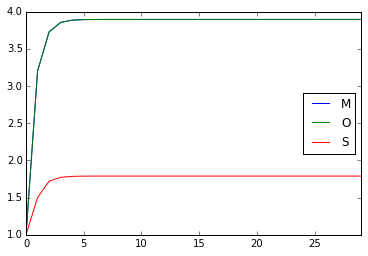

In [55]:
model(i=1.4, r1=1.2, r2=1.1, b=1.4, c=1.1, d=1).plot()

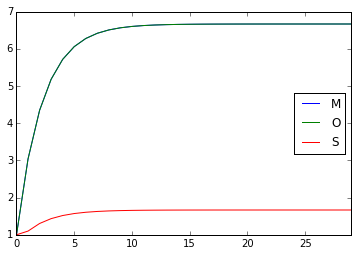

In [57]:
model(r1=1.2, r2=1.1, b=1.4, c=1.1, d=.6).plot()